## Imports

In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

In [2]:
tqdm.pandas()

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/semcovici/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Definitions

In [4]:
path_raw_data = '../data/raw/'

In [5]:
# choose the corpus for the analysis
corpus = 'ig'

## Read Data

In [6]:
# read data
data = pd.read_csv(
    path_raw_data + f'r3_{corpus}_test_users.csv', 
    sep = ';', 
    encoding='utf-8-sig'
    )

In [7]:
data.head()

,User_ID,Timeline,Stance,Polarity,Tweet_Seq
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441


## analysis

### Basic describe

In [8]:
# % of observations per label
data.Polarity.value_counts() / len(data) 

Polarity
against    0.565943
for        0.434057
Name: count, dtype: float64

In [9]:
# question: there is nan data?
print('len data with nan: ', data.shape)
print('len data without nan: ', data.dropna().shape)

len data with nan:  (599, 5)
len data without nan:  (599, 5)


In [10]:
# question: there is rows completely duplicated?
print('len data with duplicates: ', data.shape)
print('len data without duplicates: ', data.drop_duplicates().shape)

len data with duplicates:  (599, 5)
len data without duplicates:  (599, 5)


In [11]:
# question: there is rows with duplicated Timeline?
print('len data with duplicates: ', data['Timeline'].shape)
print('len data without duplicates: ', data['Timeline'].drop_duplicates().shape)

len data with duplicates:  (599,)
len data without duplicates:  (599,)


In [12]:
# question: where is the duplicated texts?
data[data.duplicated(subset=['Timeline'])].sort_values('Timeline')

,User_ID,Timeline,Stance,Polarity,Tweet_Seq


In [13]:
# question: there is duplicated users?
print('len data with duplicates: ', data['User_ID'].shape)
print('len data without duplicates: ', data['User_ID'].drop_duplicates().shape)

len data with duplicates:  (599,)
len data without duplicates:  (599,)


In [14]:
# create the dataset to analysis
## remove the rows who have duplicated texts
data_2_anl = data.drop_duplicates(subset=['Timeline'])
data_2_anl

,User_ID,Timeline,Stance,Polarity,Tweet_Seq
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441
...,...,...,...,...,...
594,r2_ig_2394,o escolhido … # as obras da arte gráfica nos c...,conservador assustado q nem rato vai pra igrej...,against,2618
595,r2_ig_2397,Maldito imperialismo caucasiano que só pensa e...,"Daciolo propõe uma ditadura cristã no Brasil, ...",against,579
596,r2_ig_2401,Só consigo pensar no BUZZ espanhol # Eu já tes...,"Sim, a imagem criada pela igreja católica tant...",against,1102
597,r2_ig_2403,Daqui ha um bilhão de anos talvez o ser humano...,Eu esperando p uber p ir pro colégio rindo da ...,against,1992


In [15]:
#number of observations per label
data_2_anl.Polarity.value_counts() / len(data)

Polarity
against    0.565943
for        0.434057
Name: count, dtype: float64

### numerical analysis of length of texts

In [16]:
# create an list of the texts in 'Texts'
data_2_anl['list_texts'] = data_2_anl.Timeline.progress_apply(lambda x: x.split(' # '))
data_2_anl.head()

100%|██████████| 599/599 [00:00<00:00, 960.92it/s] 


,User_ID,Timeline,Stance,Polarity,Tweet_Seq,list_texts
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874,"[@ ta fzd oq, uma amiga minha tava na rua quan..."
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988,"[@ Ola Como ta, Vamo Seguir @ estamos querendo..."
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532,"[papai me deu um irmão lindo desse, cansada de..."
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661,"[Né primeiro de abril não ta, Pena que um pais..."
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441,"[já acordei nun desânimo que pqp, vontade de n..."


In [17]:
# count the texts in 'Texts'
data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))
data_2_anl.head()

100%|██████████| 599/599 [00:00<00:00, 496421.28it/s]


,User_ID,Timeline,Stance,Polarity,Tweet_Seq,list_texts,n_texts
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874,"[@ ta fzd oq, uma amiga minha tava na rua quan...",2308
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988,"[@ Ola Como ta, Vamo Seguir @ estamos querendo...",4999
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532,"[papai me deu um irmão lindo desse, cansada de...",5014
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661,"[Né primeiro de abril não ta, Pena que um pais...",3775
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441,"[já acordei nun desânimo que pqp, vontade de n...",1565


In [18]:
# create tokens in each text in 'Texts'
data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])
data_2_anl.head()

100%|██████████| 599/599 [02:31<00:00,  3.95it/s]


,User_ID,Timeline,Stance,Polarity,Tweet_Seq,list_texts,n_texts,list_texts_tokens
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874,"[@ ta fzd oq, uma amiga minha tava na rua quan...",2308,"[[@, ta, fzd, oq], [uma, amiga, minha, tava, n..."
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988,"[@ Ola Como ta, Vamo Seguir @ estamos querendo...",4999,"[[@, Ola, Como, ta], [Vamo, Seguir, @, estamos..."
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532,"[papai me deu um irmão lindo desse, cansada de...",5014,"[[papai, me, deu, um, irmão, lindo, desse], [c..."
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661,"[Né primeiro de abril não ta, Pena que um pais...",3775,"[[Né, primeiro, de, abril, não, ta], [Pena, qu..."
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441,"[já acordei nun desânimo que pqp, vontade de n...",1565,"[[já, acordei, nun, desânimo, que, pqp], [vont..."


In [19]:
# count tokens in each text in 'Texts'
data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])
data_2_anl.head()

100%|██████████| 599/599 [00:00<00:00, 4511.49it/s]


,User_ID,Timeline,Stance,Polarity,Tweet_Seq,list_texts,n_texts,list_texts_tokens,list_texts_len
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874,"[@ ta fzd oq, uma amiga minha tava na rua quan...",2308,"[[@, ta, fzd, oq], [uma, amiga, minha, tava, n...","[4, 18, 6, 7, 5, 9, 2, 6, 2, 14, 12, 25, 15, 4..."
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988,"[@ Ola Como ta, Vamo Seguir @ estamos querendo...",4999,"[[@, Ola, Como, ta], [Vamo, Seguir, @, estamos...","[4, 11, 12, 24, 10, 12, 7, 7, 21, 13, 9, 4, 13..."
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532,"[papai me deu um irmão lindo desse, cansada de...",5014,"[[papai, me, deu, um, irmão, lindo, desse], [c...","[7, 16, 4, 42, 52, 25, 12, 22, 9, 15, 5, 12, 1..."
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661,"[Né primeiro de abril não ta, Pena que um pais...",3775,"[[Né, primeiro, de, abril, não, ta], [Pena, qu...","[6, 14, 6, 7, 6, 9, 3, 15, 2, 2, 11, 7, 13, 4,..."
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441,"[já acordei nun desânimo que pqp, vontade de n...",1565,"[[já, acordei, nun, desânimo, que, pqp], [vont...","[6, 9, 7, 29, 10, 5, 12, 26, 13, 15, 4, 6, 12,..."


[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

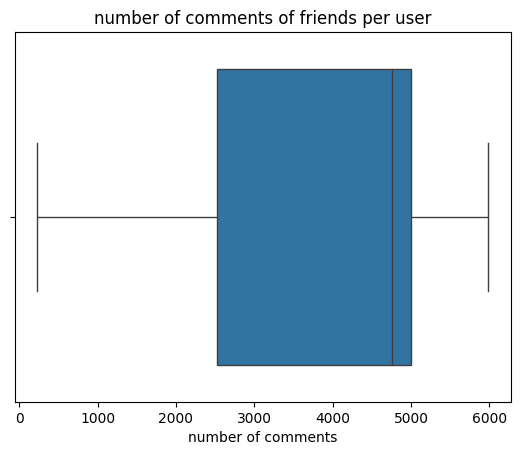

In [20]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts"
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

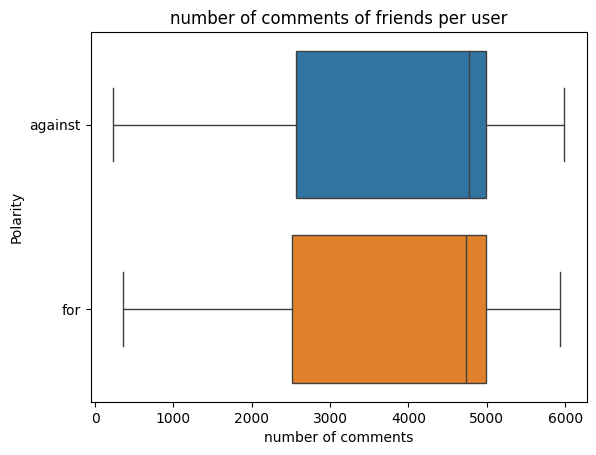

In [21]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts",
    y='Polarity',
    hue='Polarity'
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

In [22]:
list_for_n_tks = []
list_against_n_tks = []
for idx, row in tqdm(data_2_anl.iterrows(), total = len(data_2_anl)):
    
    label = row['Polarity']
    list_texts_len = row['list_texts_len']
    
    if label == 'for':
        list_for_n_tks += list_texts_len
    elif label == 'against':
        list_against_n_tks += list_texts_len

100%|██████████| 599/599 [00:00<00:00, 13642.42it/s]


[Text(0.5, 1.0, 'number of token in comments by polarity'),
 Text(0.5, 0, 'number of tokens')]

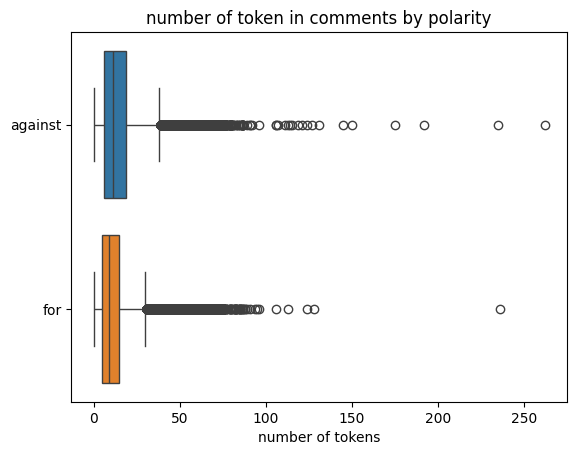

In [23]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    ).set(
        title='number of token in comments by polarity',
        xlabel='number of tokens'
    )

[Text(0.5, 1.0, 'number of token in comments by polarity (without outliers)'),
 Text(0.5, 0, 'number of tokens')]

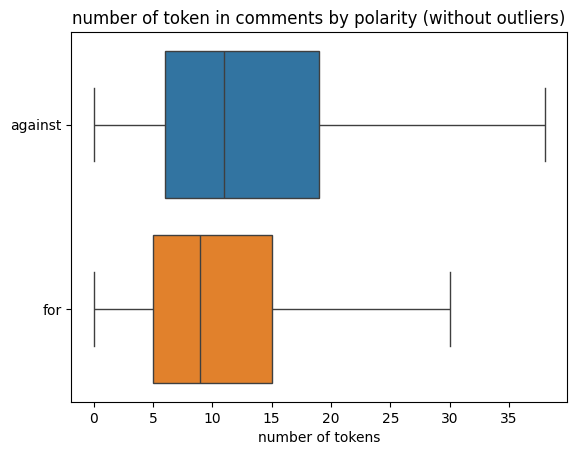

In [24]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    showfliers = False
    ).set(
        title='number of token in comments by polarity (without outliers)',
        xlabel='number of tokens'
    )

In [29]:
data_2_anl.head()

,User_ID,Timeline,Stance,Polarity,Tweet_Seq,list_texts,n_texts,list_texts_tokens,list_texts_len
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874,"[@ ta fzd oq, uma amiga minha tava na rua quan...",2308,"[[@, ta, fzd, oq], [uma, amiga, minha, tava, n...","[4, 18, 6, 7, 5, 9, 2, 6, 2, 14, 12, 25, 15, 4..."
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988,"[@ Ola Como ta, Vamo Seguir @ estamos querendo...",4999,"[[@, Ola, Como, ta], [Vamo, Seguir, @, estamos...","[4, 11, 12, 24, 10, 12, 7, 7, 21, 13, 9, 4, 13..."
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532,"[papai me deu um irmão lindo desse, cansada de...",5014,"[[papai, me, deu, um, irmão, lindo, desse], [c...","[7, 16, 4, 42, 52, 25, 12, 22, 9, 15, 5, 12, 1..."
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661,"[Né primeiro de abril não ta, Pena que um pais...",3775,"[[Né, primeiro, de, abril, não, ta], [Pena, qu...","[6, 14, 6, 7, 6, 9, 3, 15, 2, 2, 11, 7, 13, 4,..."
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441,"[já acordei nun desânimo que pqp, vontade de n...",1565,"[[já, acordei, nun, desânimo, que, pqp], [vont...","[6, 9, 7, 29, 10, 5, 12, 26, 13, 15, 4, 6, 12,..."


In [31]:
data

,User_ID,Timeline,Stance,Polarity,Tweet_Seq
0,r2_ig_2,@ ta fzd oq # uma amiga minha tava na rua quan...,nao me diz que isso é de igreja católica pf,against,1874
1,r2_ig_3,@ Ola Como ta # Vamo Seguir @ estamos querendo...,Se a igreja faz isso ela devia ser isenta mesm...,against,3988
2,r2_ig_5,papai me deu um irmão lindo desse # cansada de...,"que pena então, por que se cada espírita for r...",against,4532
3,r2_ig_6,Né primeiro de abril não ta # Pena que um pais...,bglh é entrar p igreja,for,2661
4,r2_ig_9,já acordei nun desânimo que pqp # vontade de n...,já vou levar pra igreja pra Deus benzer pq o q...,for,1441
...,...,...,...,...,...
594,r2_ig_2394,o escolhido … # as obras da arte gráfica nos c...,conservador assustado q nem rato vai pra igrej...,against,2618
595,r2_ig_2397,Maldito imperialismo caucasiano que só pensa e...,"Daciolo propõe uma ditadura cristã no Brasil, ...",against,579
596,r2_ig_2401,Só consigo pensar no BUZZ espanhol # Eu já tes...,"Sim, a imagem criada pela igreja católica tant...",against,1102
597,r2_ig_2403,Daqui ha um bilhão de anos talvez o ser humano...,Eu esperando p uber p ir pro colégio rindo da ...,against,1992


In [45]:
data_2_anl['Text_in_pos_Tweet_Seq'] = data_2_anl.apply(lambda x: x.list_texts[x.Tweet_Seq], axis = 1)

In [46]:
data_2_anl.list_texts[0][1874]

''

In [48]:
data_2_anl['Text_in_pos_Tweet_Seq'].sort_values()

0       
395     
396     
397     
398     
      ..
200     
201     
202     
204     
598     
Name: Text_in_pos_Tweet_Seq, Length: 599, dtype: object